<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.397210,83.981535,97.412820,0.003066,272.794631,272.790548,0.004083
1,0.0,1.0,56.498057,95.617481,86.799889,-0.002752,248.912675,248.914318,-0.001643
2,0.0,2.0,88.593156,62.240256,50.781676,0.002869,211.617956,211.615667,0.002289
3,0.0,3.0,68.614464,54.061107,54.066651,-0.001445,186.740777,186.743385,-0.002608
4,0.0,4.0,53.467627,69.183495,35.351923,0.001596,168.004641,168.003947,0.000694
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.591517,47.622892,28.565645,-0.005249,163.774804,163.777741,-0.002938
29996,999.0,26.0,51.626795,73.061489,24.723568,-0.001870,159.409982,159.411120,-0.001138
29997,999.0,27.0,53.407723,20.783796,90.566693,-0.010123,174.748089,174.755623,-0.007534
29998,999.0,28.0,85.331916,46.733219,87.793130,-0.007576,229.850688,229.855893,-0.005205


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.397210,83.981535,97.412820,0.003066,272.794631,272.790548,0.004083
1,0.0,1.0,56.498057,95.617481,86.799889,-0.002752,248.912675,248.914318,-0.001643
2,0.0,2.0,88.593156,62.240256,50.781676,0.002869,211.617956,211.615667,0.002289
3,0.0,3.0,68.614464,54.061107,54.066651,-0.001445,186.740777,186.743385,-0.002608
4,0.0,4.0,53.467627,69.183495,35.351923,0.001596,168.004641,168.003947,0.000694
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.591517,47.622892,28.565645,-0.005249,163.774804,163.777741,-0.002938
29996,999.0,26.0,51.626795,73.061489,24.723568,-0.001870,159.409982,159.411120,-0.001138
29997,999.0,27.0,53.407723,20.783796,90.566693,-0.010123,174.748089,174.755623,-0.007534
29998,999.0,28.0,85.331916,46.733219,87.793130,-0.007576,229.850688,229.855893,-0.005205


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.397210,83.981535,97.412820,0.003066,272.794631,272.790548,0.004083
1,0.0,1.0,56.498057,95.617481,86.799889,-0.002752,248.912675,248.914318,-0.001643
2,0.0,2.0,88.593156,62.240256,50.781676,0.002869,211.617956,211.615667,0.002289
3,0.0,3.0,68.614464,54.061107,54.066651,-0.001445,186.740777,186.743385,-0.002608
4,0.0,4.0,53.467627,69.183495,35.351923,0.001596,168.004641,168.003947,0.000694
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.591517,47.622892,28.565645,-0.005249,163.774804,163.777741,-0.002938
29996,999.0,26.0,51.626795,73.061489,24.723568,-0.001870,159.409982,159.411120,-0.001138
29997,999.0,27.0,53.407723,20.783796,90.566693,-0.010123,174.748089,174.755623,-0.007534
29998,999.0,28.0,85.331916,46.733219,87.793130,-0.007576,229.850688,229.855893,-0.005205


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

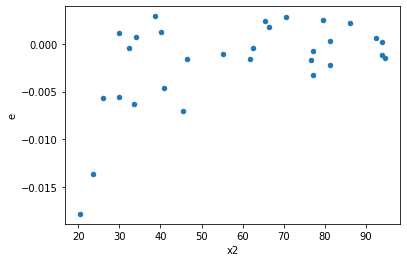

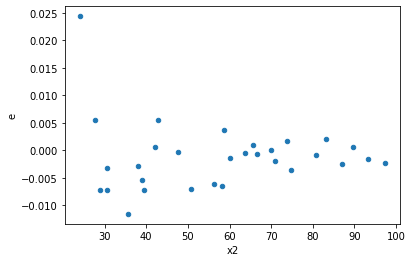

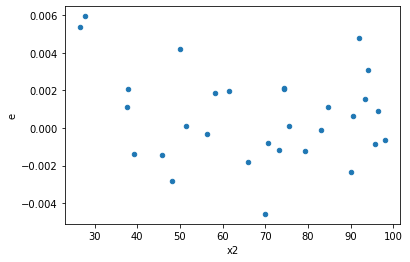

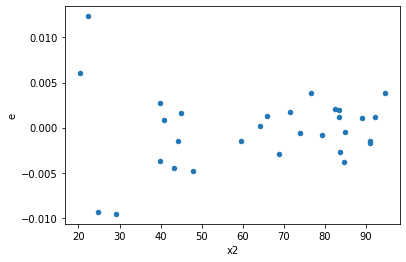

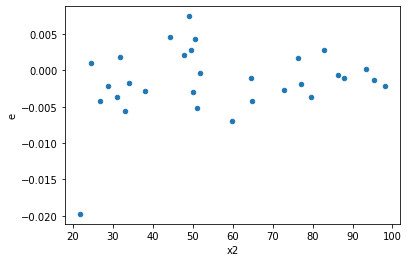

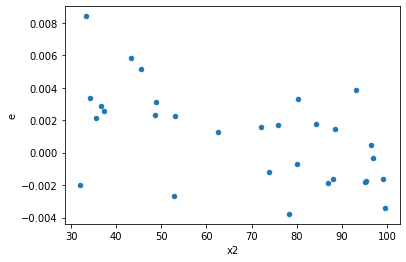

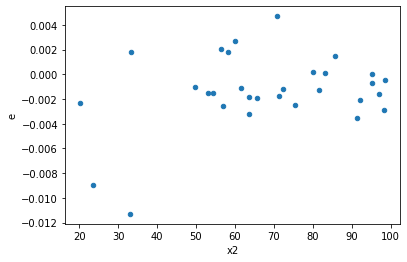

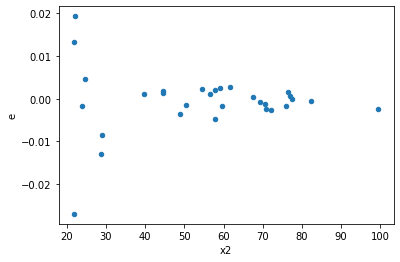

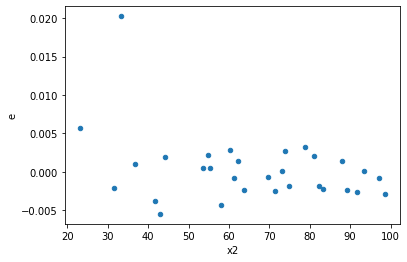

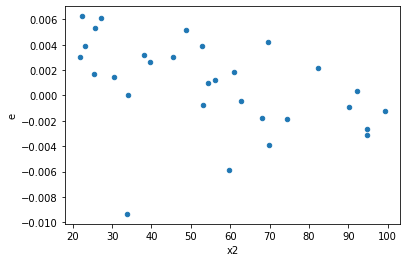

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
12.0,9.0,9.0,3.5119243368678454e-05,3.905075175474668e-05,3.902138152075384e-06,4.338972417194076e-06,1.111947411417599,0.8769929350308998,0.5615035324845501,0.4384964675154499,Reject005=1 : Homoscedasticity
948.0,9.0,9.0,3.7151373454589516e-05,3.9388815933729974e-05,4.1279303838432794e-06,4.3765351037477746e-06,1.0602250272624592,0.9320089906227433,0.5339955046886283,0.46600449531137167,Reject005=1 : Homoscedasticity
986.0,9.0,9.0,2.5879435884790522e-05,5.490665998827329e-05,2.875492876087836e-06,6.100739998697032e-06,2.1216327988255035,0.2778082948452052,0.8610958525773974,0.1389041474226026,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.00013125616704276268,2.0224892016620323e-05,1.4584018560306966e-05,2.247210224068925e-06,0.15408717527178087,0.010281997775073813,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,0.0005873615459323876,3.2451518552110415e-05,6.526239399248752e-05,3.605724283567824e-06,0.05524964781376065,0.00019544042637035993,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,0.0003981672779436504,3.866031300007875e-05,4.42408086604056e-05,4.295590333342083e-06,0.09709565587544351,0.0018599088910174711,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,0.00023381291220762884,3.72195507465436e-05,2.5979212467514316e-05,4.135505638504845e-06,0.15918518098560858,0.011529523398640955,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.001002828475166711,7.86683476983345e-05,0.00011142538612963456,8.740927522037168e-06,0.07844646382349346,0.0008072903051396124,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,0.00046091032933018945,5.308035758352309e-05,5.1212258814465495e-05,5.897817509280343e-06,0.11516417447328912,0.003558973915175549,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.0007194940408933177,3.170186753550334e-05,7.994378232147975e-05,3.522429726167038e-06,0.04406133440124475,7.633309469600917e-05,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,0.0003807752445544741,3.982279085733517e-05,4.230836050605268e-05,4.424754539703908e-06,0.10458345553406395,0.0024725139787738896,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.0004953893028050188,4.966234736862609e-05,5.5043255867224314e-05,5.51803859651401e-06,0.1002491315162144,0.0021031253520007102,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    884
Reject005=1 : Homoscedasticity      116
Name: Result_test, dtype: int64